In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Style.mplstyle')
import pandas as pd
import os
import sys
from matplotlib.ticker import FuncFormatter
import time
from datetime import datetime
import matplotlib.dates as mdates
import linecache
from iminuit import Minuit 
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from Laura import *
from calculations import *

In [2]:
#Read CPC data 

parent = '../../Lund/CPC' 
names = ['test1_CPC', 'test2_CPC', 'test3_CPC', 'test4_CPC', 'test5_CPC', 'test6_CPC', 'test7_CPC', 'test8_CPC', 'test9_CPC', 'test10_CPC', 'test11_CPC']

data_CPC = read_CPC(parent) 

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: C

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon = False)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon = False)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon = False)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in leg

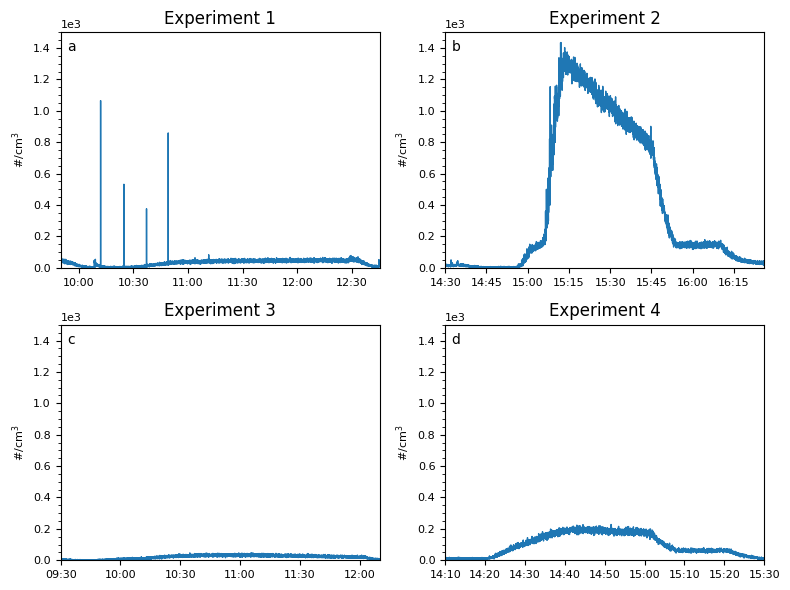

In [3]:
# Plot CPC timeseries

Timestamps_CPC = [['09:50:00', '12:50:00'],
                  ['14:30:00', '16:30:00'],
                  ['09:30:00', '12:10:00'],
                  ['14:10:00', '15:30:00']] 

CPC_dict_keys = ['test7_CPC', 'test8_CPC', 'test9_CPC', 'test10_CPC'] 


fig, axes = plt.subplots(2, 2, figsize = (8, 6))

for i, key in enumerate(CPC_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]



    plot_LCS_single(ax, data_CPC, CPC_dict_keys[i], Timestamps_CPC[i][0], Timestamps_CPC[i][1], data_CPC['test7_CPC'].keys()[1], '#/cm$^3$', 'Time', None)

    ax.set_ylim(0, 1500)
    
    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Timeseries_CPC.png', dpi = 600)


In [4]:
# Mean conc for CPC

timestamps_exp = np.array([['10:45:00', '12:26:00'],
                  ['15:00:00', '15:34:00'],
                  ['10:20:00', '12:00:00'],
                  ['14:30:00', '15:00:00']], dtype = object)


dm_nørreport = get_mean_conc(data_CPC, ['test7_CPC', 'test8_CPC', 'test9_CPC', 'test10_CPC'], 'Time', timestamps_exp,  data_CPC['test10_CPC'].keys()[1], 'CPC_mean_conc.csv')
display(dm_nørreport)

[ 4343. 10403.]
[3887. 5927.]
[3577. 9577.]
[4319. 6119.]


,test7_CPC time start,test7_CPC time end,test7_CPC,test8_CPC time start,test8_CPC time end,test8_CPC,test9_CPC time start,test9_CPC time end,test9_CPC,test10_CPC time start,test10_CPC time end,test10_CPC
0,2024-11-29 10:45:00,2024-11-29 12:26:00,42.491914,2024-11-29 15:00:00,2024-11-29 15:34:00,893.570588,2024-11-29 10:20:00,2024-11-29 12:00:00,27.960833,2024-11-29 14:30:00,2024-11-29 15:00:00,174.663333


In [5]:
# read LCS data: KU 

parent = '../../Lund/LCS_vores' 
names = ['DG-0051', 'DG-0049']

data_LCS_KU = read_LCS_KU_data(parent, 'timestamp', names) 
display(data_LCS_KU['DG-0049'])

,Unnamed: 0,timestamp,ALEC1_AE1,ALEC1_AE2,ALEC1_WE1,ALEC1_WE2,ALEC1_dV1,ALEC3_AE1,ALEC3_AE2,ALEC3_WE1,...,SPS30_PM2.5,SPS30_PM4,VEML6040_AL,VEML6040_Blue,VEML6040_ColorTemp,VEML6040_Green,VEML6040_RED,VEML6040_White,continuousMessages,dTS_RC_Cli
0,0,15/10/2024 11:00:34,1.860890,0.570109,0.329986,0.596958,-1.5309,0.778325,1.204154,0.754778,...,0.831256,0.975235,12.093225,90,27296,371,586,758,0,-1742742202836
1,1,15/10/2024 11:01:34,1.746233,0.570177,0.624072,0.596072,-1.1222,0.994914,1.237742,0.971687,...,0.595875,0.700722,12.066340,94,35527,374,588,763,1,-1742742203093
2,2,15/10/2024 11:02:34,1.693946,0.570511,0.740895,0.595509,-0.9531,1.085269,1.259128,1.056064,...,0.580729,0.681472,11.800362,94,34313,365,584,756,2,-1742742203737
3,3,15/10/2024 11:03:34,1.654284,0.570409,0.813692,0.595284,-0.8406,1.134775,1.273144,1.104163,...,0.642818,0.746968,11.910522,92,35714,364,583,757,3,-1742742203734
4,4,15/10/2024 11:04:34,1.619170,0.570642,0.866410,0.595228,-0.7528,1.171628,1.285836,1.141174,...,0.482170,0.553418,11.861583,92,27226,364,582,755,4,-1742742203338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,3135,17/10/2024 15:36:05,1.418146,0.562442,0.285961,0.578020,-1.1322,1.400839,1.403459,1.397418,...,1.632664,2.179213,11.688820,92,47966,358,574,751,30,-1742742205303
3136,3136,17/10/2024 15:37:07,1.422684,0.562504,0.282638,0.578250,-1.1400,1.400173,1.402746,1.395409,...,1.398203,1.824603,11.590765,88,43848,354,570,747,31,-1742742202128
3137,3137,17/10/2024 15:38:07,1.459751,0.562943,0.353720,0.578323,-1.1060,1.402462,1.405806,1.398640,...,1.170614,1.498211,11.563297,89,34128,354,571,744,32,-1742742203273
3138,3138,17/10/2024 15:39:08,1.418853,0.563744,0.304670,0.579279,-1.1142,1.394361,1.396814,1.390515,...,1.452525,1.819074,11.601749,89,24856,355,571,747,33,-1742742202747


In [6]:
# read LCS data: OPC5000

parent = '../../Lund/LCS_vores' 
names = ['LCS109_2024-10-14', 'LCS109_2024-10-15', 'LCS109_2024-10-16', 'LCS109_2024-10-17']

data_LCS_OPC500 = read_LCS_data_OPC5000(parent, 'timestamp', names, ',') 

In [7]:
# Read LCS data: Lund 
parent = '../../Lund/LCS_vores' 
names = ['LC_20241015', 'LC_20241016', 'LC_20241017']

data_LCS_LUND = read_LCS_data_LUND(parent, 'Timestamp', names) 
print(type(data_LCS_LUND['2024-10-15 DG-0070']))

<class 'pandas.core.frame.DataFrame'>


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid e

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\

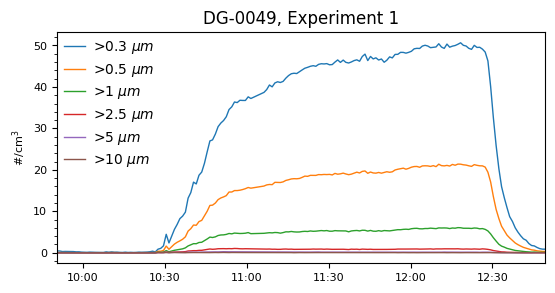

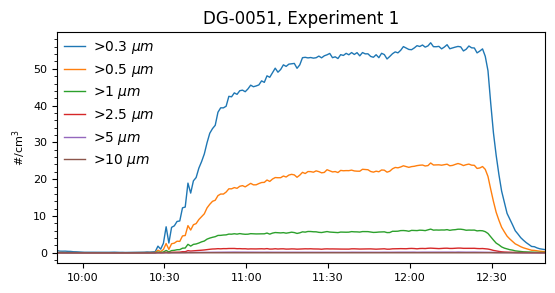

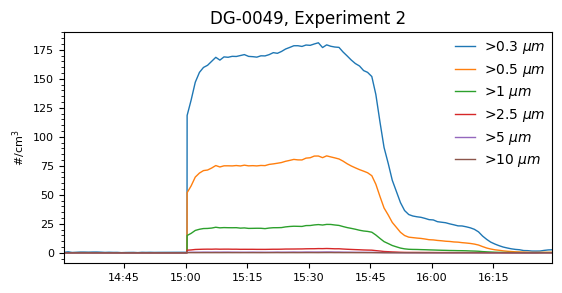

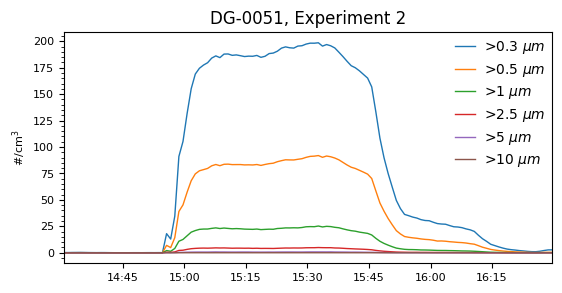

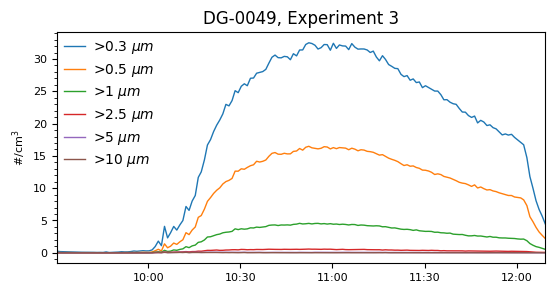

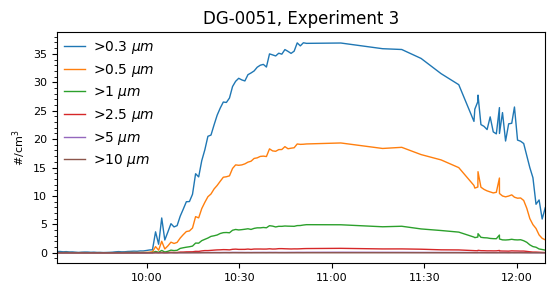

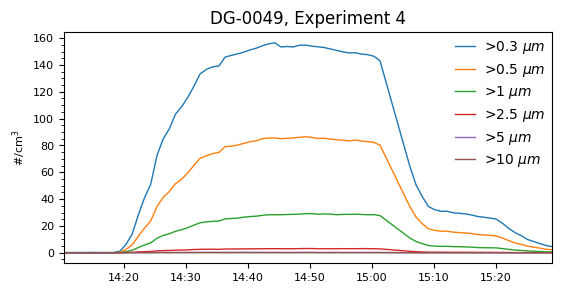

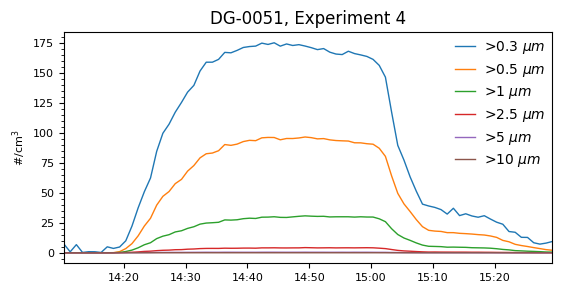

In [8]:
Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_KU_keys =['DG-0049', 'DG-0051']

for i in range(4): 
    exp_number = str(i+1)
    fig_name = 'LCS_KU_timeseries' + exp_number + '.png'

    fig, ax = plt.subplots(figsize = (6.3,3))

    ax.set_title('DG-0049, Experiment ' + exp_number)

# For 0049 sensor

    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', '>0.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', '>1 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', '>2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', '>5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', '>10 $\mu m$')



    fig, ax = plt.subplots(figsize = (6.3,3))

    ax.set_title('DG-0051, Experiment ' + exp_number)

# For 0051 sensor

    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', '>0.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', '>1 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', '>2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', '>5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', '>10 $\mu m$')



<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\4201619741.py:19: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\4201619741.py:20: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_singl

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

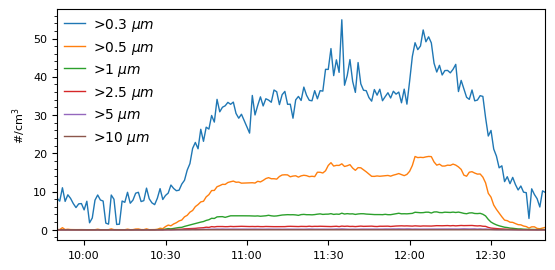

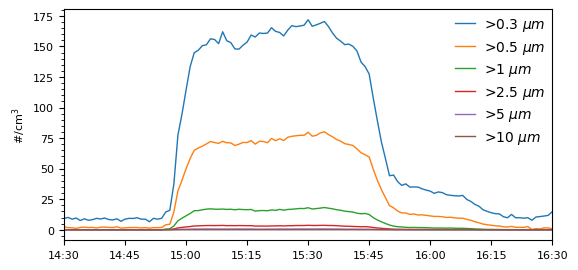

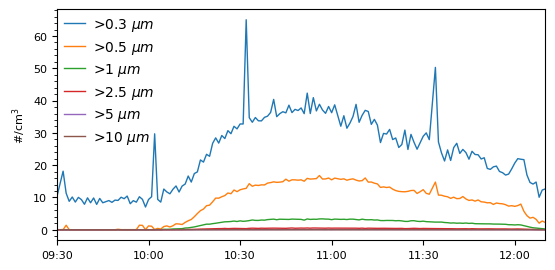

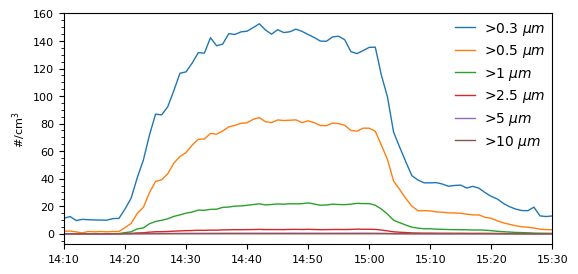

In [9]:
# plot LCS data: OPC500

Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_dict_keys = ['LCS109_2024-10-16', 'LCS109_2024-10-16','LCS109_2024-10-17','LCS109_2024-10-17'] 

for i, key in enumerate(LCS_dict_keys): 
    exp_number = str(i+1)
    fig_name = 'LCS_OPC500_timeseries' + exp_number + '.png'

    fig, ax = plt.subplots(figsize = (6.3,3))

# For 109 sensor

    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', '>0.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', '>1 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', '>2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', '>5 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', '>10 $\mu m$')



    fig.savefig(fig_name, dpi = 600)



<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid e

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

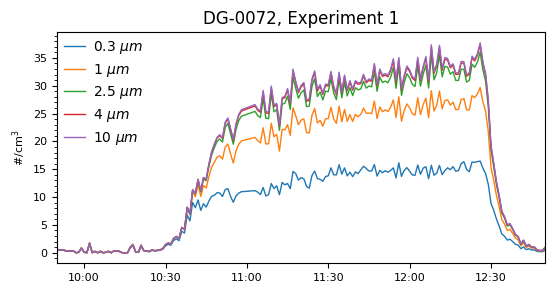

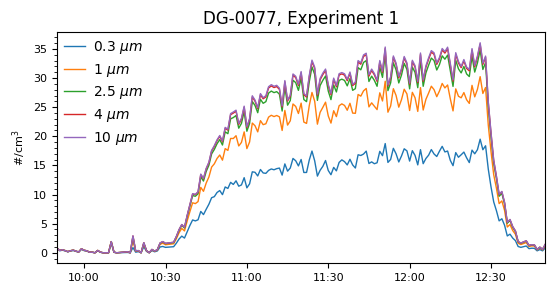

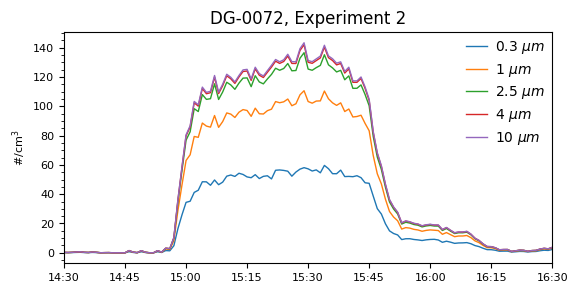

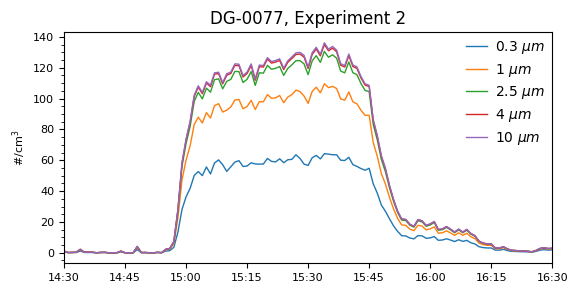

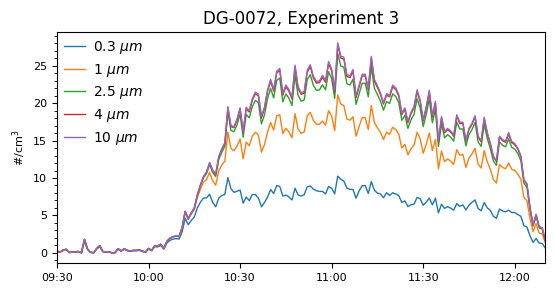

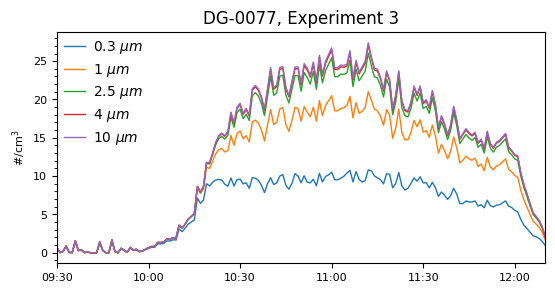

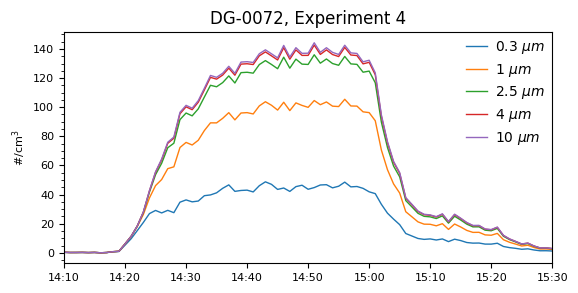

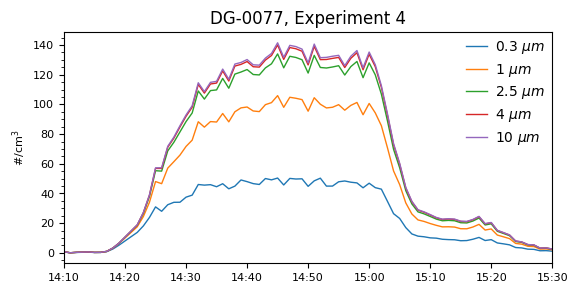

In [10]:
# Plot LCS data: Lund 

Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_dict_keys = ['DG-0072', 'DG-0077']

for i in range(4):
    date = Timestamps_LCS[i][0].split(' ')[0]
    exp_number = str(i+1)
    fig_name = 'LCS_LUND_timeseries' + exp_number + '.png'

    fig, ax = plt.subplots(figsize = (6.3,3))

    ax.set_title('DG-0072, Experiment ' + exp_number)

    plot_LCS_single(ax, data_LCS_LUND, date + ' ' + LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN0.5, #/m3', '#/cm$^3$', 'Timestamp', '0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND, date + ' ' + LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN1, #/cm3', '#/cm$^3$', 'Timestamp', '1 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND, date + ' ' + LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN2.5, #/cm3', '#/cm$^3$', 'Timestamp', '2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND, date + ' ' + LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN4, #/cm3', '#/cm$^3$', 'Timestamp', '4 $\mu m$') 
    plot_LCS_single(ax, data_LCS_LUND, date + ' ' + LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN10, #/cm3', '#/cm$^3$', 'Timestamp', '10 $\mu m$')
    
   

    fig, ax = plt.subplots(figsize = (6.3,3))

    ax.set_title('DG-0077, Experiment ' + exp_number)

    plot_LCS_single(ax, data_LCS_LUND,  date + ' ' + LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN0.5, #/m3', '#/cm$^3$', 'Timestamp', '0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND,  date + ' ' + LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN1, #/cm3', '#/cm$^3$', 'Timestamp', '1 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND,  date + ' ' + LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN2.5, #/cm3', '#/cm$^3$', 'Timestamp', '2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND,  date + ' ' + LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN4, #/cm3', '#/cm$^3$', 'Timestamp', '4 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND,  date + ' ' + LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN10, #/cm3', '#/cm$^3$', 'Timestamp', '10 $\mu m$')



    # fig.savefig(fig_name, dpi = 600)


<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:107: SyntaxWarning: invalid escape sequence '\m'
<>:139: SyntaxWarning: invalid escape sequence '\m'
<>:170: SyntaxWarning: invalid escape sequence '\m'
<>:201: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:107: SyntaxWarning: invalid escape sequence '\m'
<>:139: SyntaxWarning: invalid escape sequence '\m'
<>:170: SyntaxWarning: invalid escape sequence '\m'
<>:201: SyntaxWarning: invalid escape sequence '\m'
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\3840006636.py:43: SyntaxWarning: invalid escape sequence '\m'
  fig.suptitle('0.3 $\mu m$')
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\3840006636.py:75: SyntaxWarning: invalid escape sequence '\m'
  fig.suptitle('0.5 $\mu m$')
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\3840006636.py:107: SyntaxWarning: invalid esca

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

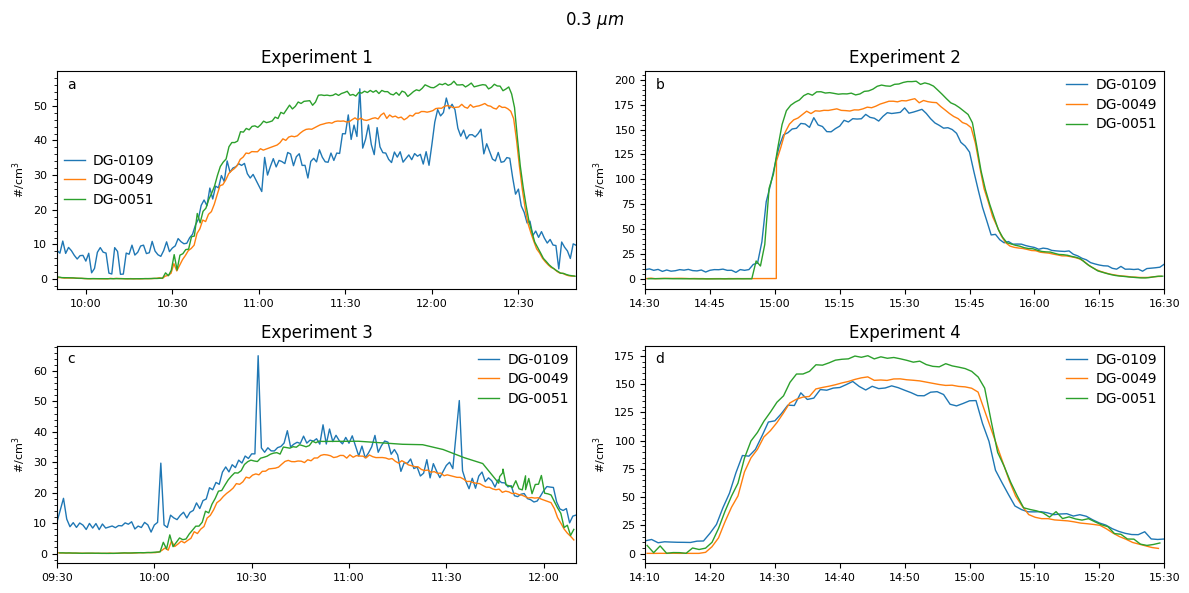

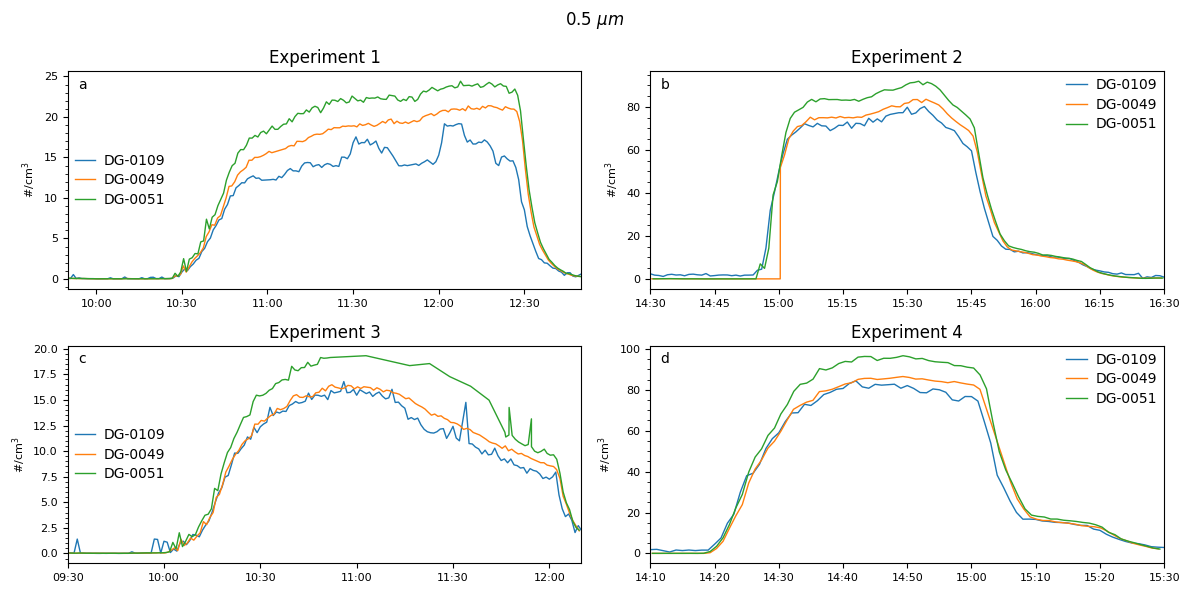

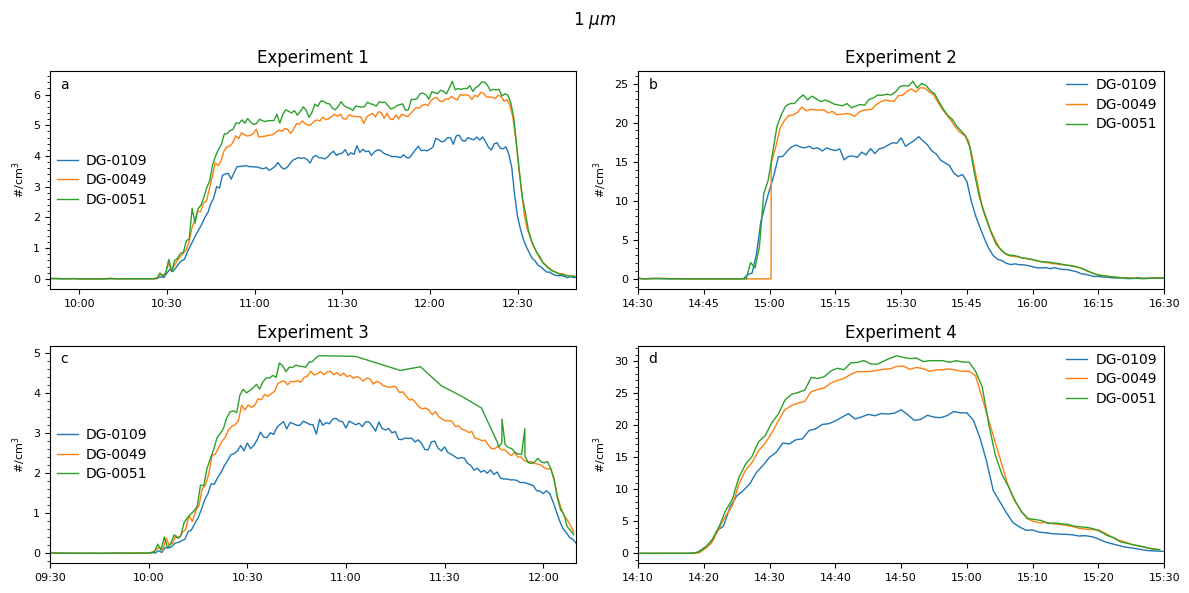

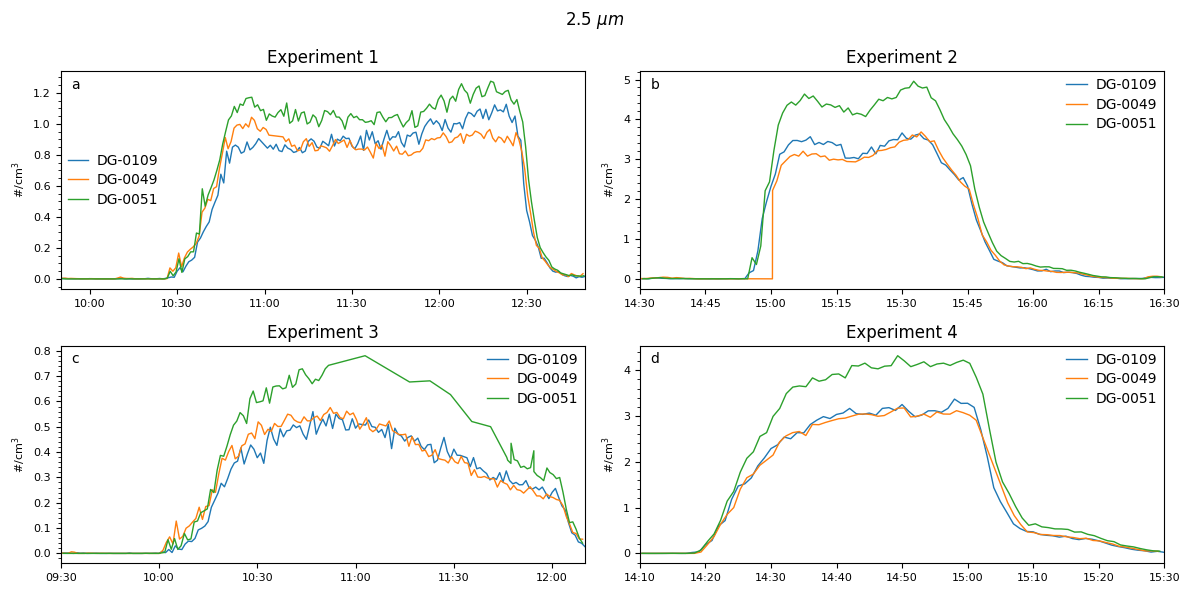

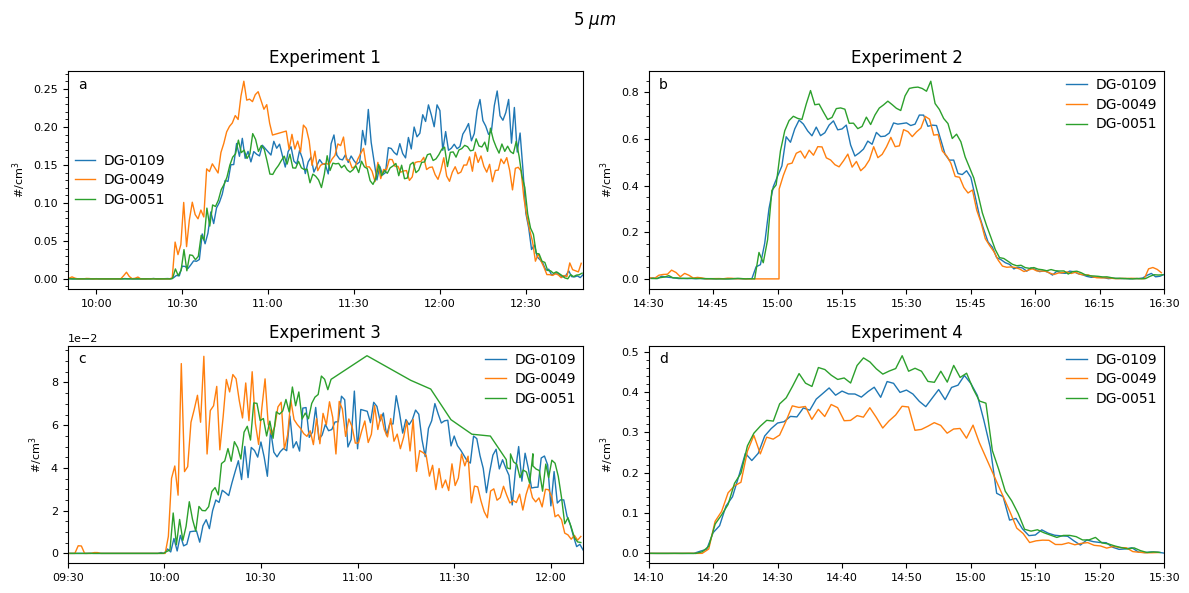

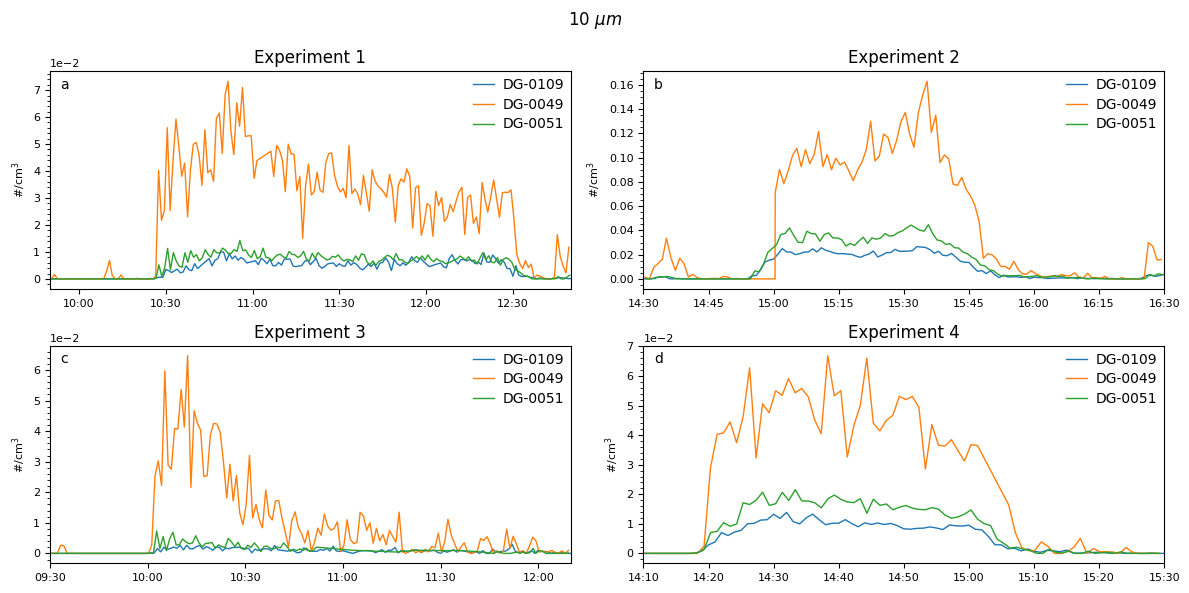

In [11]:
# KU + OPC5000 sensor 



Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_dict_keys = ['LCS109_2024-10-16', 'LCS109_2024-10-16','LCS109_2024-10-17','LCS109_2024-10-17'] 

LCS_KU_keys =['DG-0049', 'DG-0051']



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

# For 0.3 


    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('0.3 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_0.3.png', dpi = 600)


# For 0.5 



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('0.5 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_0.5.png', dpi = 600)


# For 1 



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('1 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_1.png', dpi = 600)


# For 2.5 



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('2.5 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_2.5.png', dpi = 600)

# For 5 



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('5 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_5.png', dpi = 600)

# For 10 



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('10 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_10.png', dpi = 600)





In [20]:
# Bins for OPC5000:

dict_keys_OPC5000 = ['LCS109_2024-10-16', 'LCS109_2024-10-17']
new_keys_OPC5000 = ['PN0_5', 'PN1', 'PN2_5', 'PN5', 'PN10']
old_keys_OPC5000 = ['PM5000S_2_PN0.3', 'PM5000S_2_PN0.5', 'PM5000S_2_PN1', 'PM5000S_2_PN2.5', 'PM5000S_2_PN5', 'PM5000S_2_PN10']


for key in dict_keys_OPC5000:
    for i in range(len(new_keys_OPC5000)):  
        data_LCS_OPC500[key][new_keys_OPC5000[i]] = (data_LCS_OPC500[key][old_keys_OPC5000[i]] - data_LCS_OPC500[key][old_keys_OPC5000[i+1]])


# new frag 

    data_LCS_OPC500[key]['PN<1'] = data_LCS_OPC500[key].iloc[:,44:46].sum(axis=1)
    data_LCS_OPC500[key]['PN<2.5'] = data_LCS_OPC500[key].iloc[:,44:46+1].sum(axis=1)
    data_LCS_OPC500[key]['PN<4'] = data_LCS_OPC500[key].iloc[:,44:46+2].sum(axis=1)
    data_LCS_OPC500[key]['PN<10'] = data_LCS_OPC500[key].iloc[:,44:46+3].sum(axis=1)


# Bins for KU:

dict_keys_KU = ['DG-0049', 'DG-0051']
new_keys_KU = ['PN0_5', 'PN1', 'PN2_5', 'PN5', 'PN10']
old_keys_KU = ['PM5000S_2_PN0.3', 'PM5000S_2_PN0.5', 'PM5000S_2_PN1', 'PM5000S_2_PN2.5', 'PM5000S_2_PN5', 'PM5000S_2_PN10']


for key in dict_keys_KU:
    for i in range(len(new_keys_KU)):  
        data_LCS_KU[key][new_keys_KU[i]] = (data_LCS_KU[key][old_keys_KU[i]] - data_LCS_KU[key][old_keys_KU[i+1]])

# New frag

data_LCS_KU['DG-0049']['PN<1'] = data_LCS_KU['DG-0049'].iloc[:,45:47].sum(axis=1)
data_LCS_KU['DG-0049']['PN<2.5'] = data_LCS_KU['DG-0049'].iloc[:,45:47+1].sum(axis=1)
data_LCS_KU['DG-0049']['PN<4'] = data_LCS_KU['DG-0049'].iloc[:,45:47+2].sum(axis=1)
data_LCS_KU['DG-0049']['PN<10'] = data_LCS_KU['DG-0049'].iloc[:,45:47+3].sum(axis=1)

data_LCS_KU['DG-0051']['PN<1'] = data_LCS_KU['DG-0051'].iloc[:,39:41].sum(axis=1)
data_LCS_KU['DG-0051']['PN<2.5'] = data_LCS_KU['DG-0051'].iloc[:,39:41+1].sum(axis=1)
data_LCS_KU['DG-0051']['PN<4'] = data_LCS_KU['DG-0051'].iloc[:,39:41+2].sum(axis=1)
data_LCS_KU['DG-0051']['PN<10'] = data_LCS_KU['DG-0051'].iloc[:,39:41+3].sum(axis=1)


# Bins for Lund: 



dict_keys_Lund = ['2024-10-16 DG-0072', '2024-10-17 DG-0072', '2024-10-16 DG-0077', '2024-10-17 DG-0072']
new_keys_Lund = ['PN1', 'PN2_5', 'PN5', 'PN10']
old_keys_Lund = ['PN0.5, #/m3', 'PN1, #/cm3', 'PN2.5, #/cm3', 'PN4, #/cm3', 'PN10, #/cm3']


for key in dict_keys_Lund:
    for i in range(len(new_keys_Lund)):  
        data_LCS_LUND[key][new_keys_Lund[i]] = (data_LCS_LUND[key][old_keys_Lund[i+1]] - data_LCS_LUND[key][old_keys_Lund[i]])




In [29]:
for key in dict_keys_OPC5000:
    data_LCS_OPC500[key].to_csv(key+'.csv')
for key in dict_keys_KU:
    data_LCS_KU[key].to_csv(key+'.csv')
for key in dict_keys_Lund:
    data_LCS_LUND[key].to_csv(key+'csv')

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])


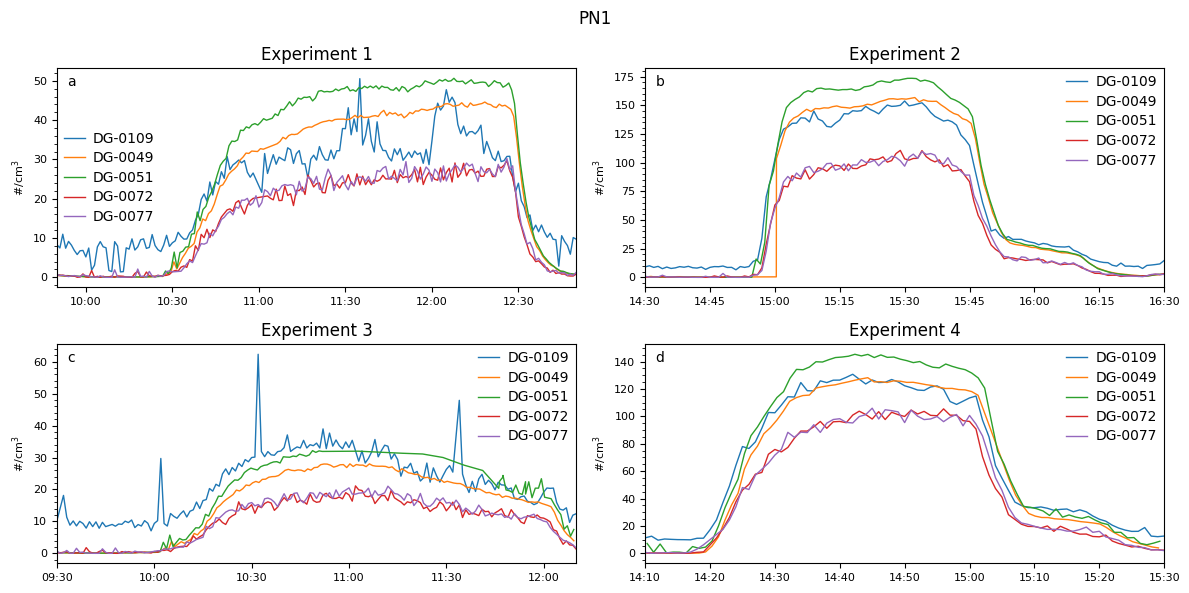

In [26]:
# Plot LCS data


Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_OPC500_dict_keys = ['LCS109_2024-10-16', 'LCS109_2024-10-16','LCS109_2024-10-17','LCS109_2024-10-17'] 

LCS_KU_keys =['DG-0049', 'DG-0051']
LCS_OPC500_keys = ['PN<1', 'PN<2.5', 'PN<4', 'PN<10']
LCS_Lund_dict_keys = ['2024-10-16 DG-0072', '2024-10-16 DG-0072', '2024-10-17 DG-0072', '2024-10-17 DG-0072', '2024-10-16 DG-0077', '2024-10-16 DG-0077', '2024-10-17 DG-0077', '2024-10-17 DG-0077']


fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_OPC500_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN<1', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN<1', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN<1', '#/cm$^3$', 'timestamp', 'DG-0051')
    plot_LCS_single(ax, data_LCS_LUND, LCS_Lund_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN1, #/cm3', '#/cm$^3$', 'Timestamp', 'DG-0072')
    plot_LCS_single(ax, data_LCS_LUND, LCS_Lund_dict_keys[i+4], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN1, #/cm3', '#/cm$^3$', 'Timestamp', 'DG-0077')
 

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('PN1')
fig.tight_layout()
fig.savefig('Timeseries_LCS_1.png', dpi = 600)



In [33]:
display(data_LCS_LUND)

{'2024-10-15 DG-0070':             Timestamp Entity Name  CO, ppm    CO2, ppm     CO_AE     CO_WE  \
 0    15/10/2024 09:00     DG-0070   0.3942  538.363647  1.431777  1.278397   
 1    15/10/2024 09:01     DG-0070   0.3566  537.181946  1.432252  1.293489   
 2    15/10/2024 09:02     DG-0070   0.3565  534.909058  1.431712  1.292985   
 3    15/10/2024 09:03     DG-0070   0.4136  532.666626  1.430316  1.269401   
 4    15/10/2024 09:04     DG-0070   0.5019  532.666687  1.430066  1.234761   
 ..                ...         ...      ...         ...       ...       ...   
 457  15/10/2024 16:55     DG-0070   0.1958  454.272736  1.444752  1.368580   
 458  15/10/2024 16:56     DG-0070   0.1974  454.777771  1.445856  1.369043   
 459  15/10/2024 16:57     DG-0070   0.1879  456.545441  1.445393  1.372291   
 460  15/10/2024 16:58     DG-0070   0.1905  454.090912  1.445765  1.371642   
 461  15/10/2024 16:59     DG-0070   0.1986  453.727295  1.444859  1.367577   
 
            LAT       LON  N

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:65: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\1648250392.py:19: SyntaxWarning: invalid escape sequence '\m'
  axes[0][0].set_ylabel('Mass concentration ($\mu g / m^3$)')
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\1648250392.py:42: SyntaxWarning: invalid escape sequence '\m'
  axes[0][1].set_ylabel ('Mass concentration ($\mu g / m^3$)')
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\1648250392.py:65: SyntaxWarning: invalid escape sequence '\m'
  axes[1][0].set_ylabel ('Mass concentration ($\mu g / m^3$)')
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\1648250392.py:86: 

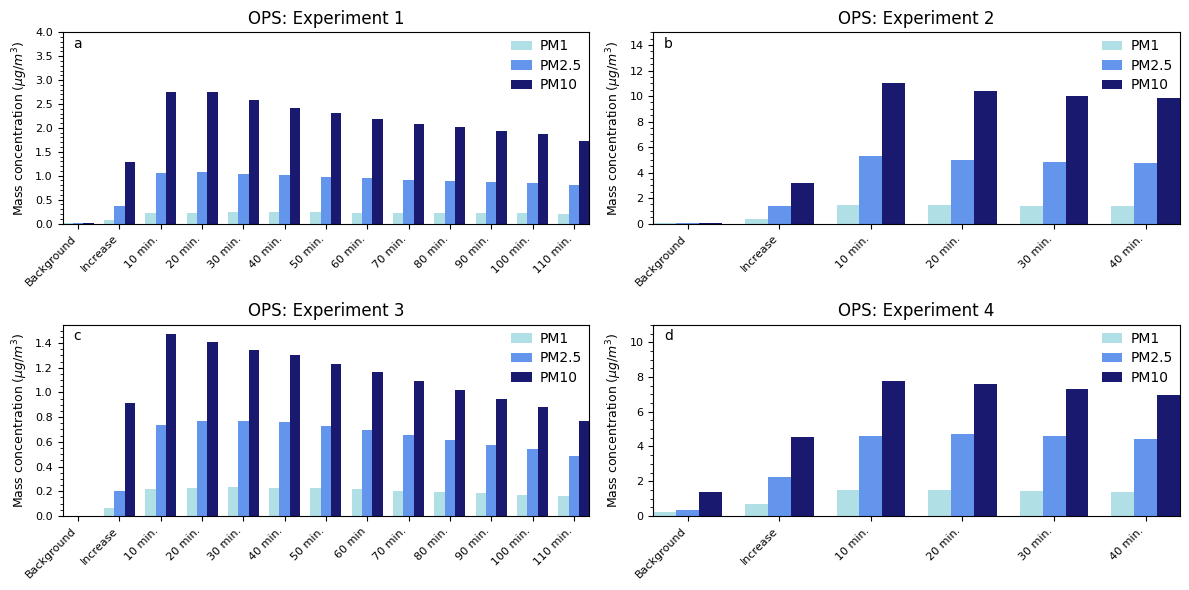

In [30]:
# Stacked bar plots for OPS mass


# For experiment 1 

timestamps = ['Background', 'Increase', '10 min.', '20 min.', '30 min.', '40 min.', '50 min.', '60 min.', '70 min.', '80 min.', '90 min.', '100 min.', '110 min.']
x = np.arange(len(timestamps))
y1 = [0.001, 0.075, 0.214, 0.227, 0.232, 0.233, 0.232, 0.229, 0.225, 0.221, 0.217, 0.213, 0.209]
y2 = [0.003, 0.363, 1.055, 1.072, 1.045, 1.012, 0.981, 0.948, 0.918, 0.893, 0.873, 0.854, 0.812]
y3 = [0.005, 1.280, 2.748, 2.742, 2.586, 2.424, 2.304, 2.192, 2.091, 2.011, 1.943, 1.882, 1.734]
width = 0.25



fig, axes = plt.subplots(2, 2, figsize = (12, 6))



axes[0][0].set_ylabel('Mass concentration ($\mu g / m^3$)')
axes[0][0].set_title('OPS: Experiment 1')
axes[0][0].bar(x-0.25, y1, width, label ='PM1', color= 'powderblue')
axes[0][0].bar(x, y2, width, label='PM2.5', color='cornflowerblue')
axes[0][0].bar(x+0.25, y3, width, label ='PM10', color = 'midnightblue')
axes[0][0].set_xticks(x)
axes[0][0].set_ylim(0, 4)
axes[0][0].set_xticklabels(timestamps, rotation=45, ha="right")
axes[0][0].legend(loc=1)


# For experiment 2 

timestamps1 = ['Background', 'Increase', '10 min.', '20 min.', '30 min.', '40 min.']
x1 = np.arange(len(timestamps1))
y4 = [0.001, 0.371, 1.475, 1.425, 1.381, 1.351]
y5 = [0.003, 1.363, 5.275, 5.012, 4.820, 4.729]
y6 = [0.027, 3.190, 11.022, 10.365, 9.967, 9.831]
width = 0.25




axes[0][1].set_ylabel ('Mass concentration ($\mu g / m^3$)')
axes[0][1].set_title ('OPS: Experiment 2')
axes[0][1].bar(x1-0.25, y4, width, label ='PM1', color='powderblue')
axes[0][1].bar(x1, y5, width, label='PM2.5', color='cornflowerblue')
axes[0][1].bar(x1+0.25, y6, width, label ='PM10', color = 'midnightblue')
axes[0][1].set_xticks(x1)
axes[0][1].set_ylim(0, 15)
axes[0][1].set_xticklabels(timestamps1, rotation=45, ha="right")
axes[0][1].legend(loc=1)


# For experiement 3 

timestamps2 = ['Background', 'Increase', '10 min.', '20 min.', '30 min.', '40 min.', '50 min.', '60 min', '70 min.', '80 min.', '90 min.', '100 min.', '110 min.']
x2 = np.arange(len(timestamps2))
y7 = [0.001, 0.061, 0.215, 0.228, 0.231, 0.230, 0.224, 0.216, 0.206, 0.195, 0.184, 0.173, 0.159]
y8 = [0.003, 0.204, 0.736, 0.770, 0.771, 0.757, 0.730, 0.695, 0.655, 0.614, 0.575, 0.539, 0.486]
y9 = [0.003, 0.911, 1.473, 1.404, 1.344, 1.301, 1.230, 1.163, 1.091, 1.017, 0.947, 0.885, 0.768 ]
width = 0.25




axes[1][0].set_ylabel ('Mass concentration ($\mu g / m^3$)')
axes[1][0].set_title ('OPS: Experiment 3')
axes[1][0].bar(x2-0.25, y7, width, label ='PM1', color= 'powderblue')
axes[1][0].bar(x2, y8, width, label='PM2.5', color='cornflowerblue')
axes[1][0].bar(x2+0.25, y9, width, label ='PM10', color ='midnightblue')
axes[1][0].set_xticks(x2)
axes[1][0].set_xticklabels(timestamps2, rotation=45, ha="right")
axes[1][0].legend()


# For experiement 4 

timestamps3 = ['Background', 'Increase', '10 min.', '20 min.', '30 min.', '40 min.']
x3 = np.arange(len(timestamps3))
y10 = [0.206, 0.676, 1.474, 1.504, 1.458, 1.402]
y11 = [0.355, 2.217, 4.617, 4.708, 4.593, 4.437]
y12 = [1.382, 4.572, 7.748, 7.609, 7.302, 6.950]
width = 0.25



axes[1][1].set_ylabel ('Mass concentration ($\mu g / m^3$)')
axes[1][1].set_title ('OPS: Experiment 4')
axes[1][1].bar(x3-0.25, y10, width, label ='PM1', color= 'powderblue')
axes[1][1].bar(x3, y11, width, label='PM2.5', color='cornflowerblue')
axes[1][1].bar(x3+0.25, y12, width, label ='PM10', color ='midnightblue')
axes[1][1].set_xticks(x3)
axes[1][1].set_ylim(0, 11)
axes[1][1].set_xticklabels(timestamps3, rotation=45, ha="right")
axes[1][1].legend(loc=1)


sublabels = ['a', 'b', 'c', 'd']
for axes, l in zip(axes.flatten(), sublabels):
    axes.text(0.02, 0.92, l, transform = axes.transAxes, fontsize = 10)

fig.tight_layout()
plt.show()

fig.savefig('running_means_bar_chart_OPS_mass.png', dpi = 600)

<>:19: SyntaxWarning: invalid escape sequence '\#'
<>:42: SyntaxWarning: invalid escape sequence '\#'
<>:65: SyntaxWarning: invalid escape sequence '\#'
<>:87: SyntaxWarning: invalid escape sequence '\#'
<>:19: SyntaxWarning: invalid escape sequence '\#'
<>:42: SyntaxWarning: invalid escape sequence '\#'
<>:65: SyntaxWarning: invalid escape sequence '\#'
<>:87: SyntaxWarning: invalid escape sequence '\#'
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\2666210910.py:19: SyntaxWarning: invalid escape sequence '\#'
  axes[0][0].set_ylabel('Number concentration ($\# / cm^3$)')
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\2666210910.py:42: SyntaxWarning: invalid escape sequence '\#'
  axes[0][1].set_ylabel ('Number concentration ($\# / cm^3$)')
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\2666210910.py:65: SyntaxWarning: invalid escape sequence '\#'
  axes[1][0].set_ylabel ('Number concentration ($\# / cm^3$)')
C:\Users\45404\AppData\Local\Temp\ipykernel_40528\2666210910.py:87: 

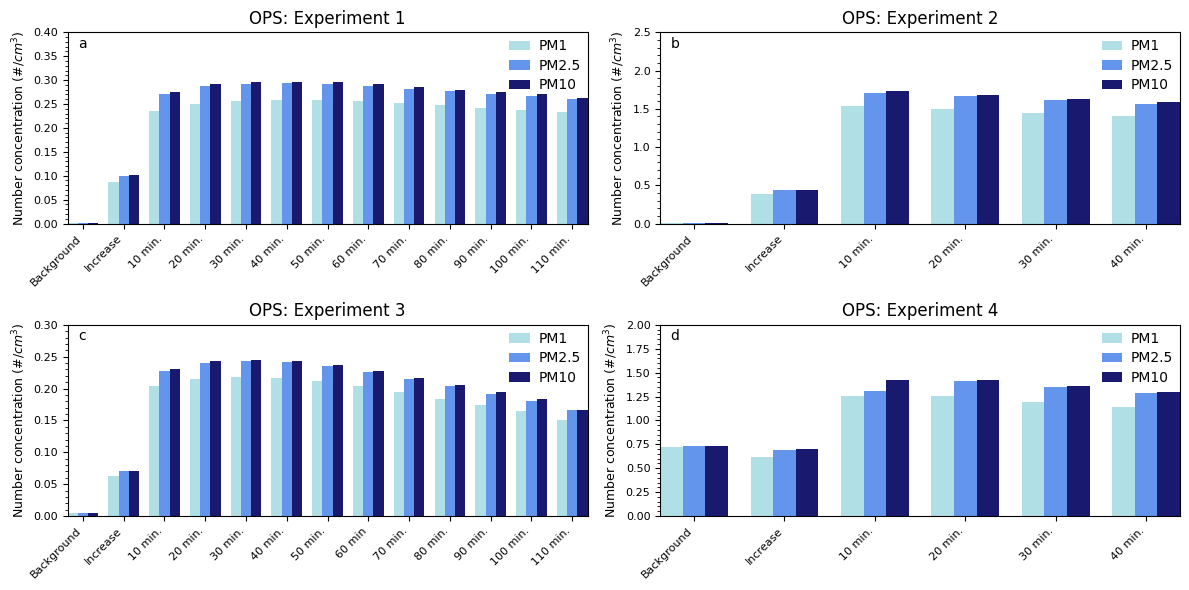

In [31]:
# Stacked bar plots for OPS number


# For experiment 1 

timestamps = ['Background', 'Increase', '10 min.', '20 min.', '30 min.', '40 min.', '50 min.', '60 min.', '70 min.', '80 min.', '90 min.', '100 min.', '110 min.']
x = np.arange(len(timestamps))
y1 = [0.002, 0.087, 0.235, 0.251, 0.257, 0.259, 0.259, 0.256, 0.252, 0.247, 0.242, 0.238, 0.233]
y2 = [0.002, 0.099, 0.270, 0.287, 0.291, 0.293, 0.291, 0.287, 0.282, 0.277, 0.271, 0.266, 0.260]
y3 = [0.002, 0.101, 0.276, 0.292, 0.296, 0.297, 0.296, 0.292, 0.286, 0.280, 0.275, 0.270, 0.263]
width = 0.25



fig, axes = plt.subplots(2, 2, figsize = (12, 6))



axes[0][0].set_ylabel('Number concentration ($\# / cm^3$)')
axes[0][0].set_title('OPS: Experiment 1')
axes[0][0].bar(x-0.25, y1, width, label ='PM1', color= 'powderblue')
axes[0][0].bar(x, y2, width, label='PM2.5', color='cornflowerblue')
axes[0][0].bar(x+0.25, y3, width, label ='PM10', color = 'midnightblue')
axes[0][0].set_xticks(x)
axes[0][0].set_ylim(0, 0.4)
axes[0][0].set_xticklabels(timestamps, rotation=45, ha="right")
axes[0][0].legend(loc=1)


# For experiment 2 

timestamps1 = ['Background', 'Increase', '10 min.', '20 min.', '30 min.', '40 min.']
x1 = np.arange(len(timestamps1))
y4 = [0.001, 0.392, 1.536, 1.499, 1.450, 1.410]
y5 = [0.002, 0.437, 1.712, 1.665, 1.609, 1.566]
y6 = [0.002, 0.443, 1.730, 1.683, 1.626, 1.583]
width = 0.25




axes[0][1].set_ylabel ('Number concentration ($\# / cm^3$)')
axes[0][1].set_title ('OPS: Experiment 2')
axes[0][1].bar(x1-0.25, y4, width, label ='PM1', color='powderblue')
axes[0][1].bar(x1, y5, width, label='PM2.5', color='cornflowerblue')
axes[0][1].bar(x1+0.25, y6, width, label ='PM10', color = 'midnightblue')
axes[0][1].set_xticks(x1)
axes[0][1].set_ylim(0, 2.5)
axes[0][1].set_xticklabels(timestamps1, rotation=45, ha="right")
axes[0][1].legend(loc=1)


# For experiement 3 

timestamps2 = ['Background', 'Increase', '10 min.', '20 min.', '30 min.', '40 min.', '50 min.', '60 min', '70 min.', '80 min.', '90 min.', '100 min.', '110 min.']
x2 = np.arange(len(timestamps2))
y7 = [0.004, 0.063, 0.204, 0.215, 0.218, 0.216, 0.212, 0.204, 0.195, 0.184, 0.174, 0.164, 0.151]
y8 = [0.004, 0.070, 0.228, 0.240, 0.243, 0.241, 0.235, 0.226, 0.215, 0.204, 0.192, 0.181, 0.166]
y9 = [0.004, 0.071, 0.231, 0.243, 0.245, 0.243, 0.237, 0.228, 0.217, 0.205, 0.194, 0.183, 0.167]
width = 0.25




axes[1][0].set_ylabel ('Number concentration ($\# / cm^3$)')
axes[1][0].set_title ('OPS: Experiment 3')
axes[1][0].bar(x2-0.25, y7, width, label ='PM1', color= 'powderblue')
axes[1][0].bar(x2, y8, width, label='PM2.5', color='cornflowerblue')
axes[1][0].bar(x2+0.25, y9, width, label ='PM10', color ='midnightblue')
axes[1][0].set_xticks(x2)
axes[1][0].set_ylim(0, 0.3)
axes[1][0].set_xticklabels(timestamps2, rotation=45, ha="right")
axes[1][0].legend(loc=1)


# For experiement 4 

timestamps3 = ['Background', 'Increase', '10 min.', '20 min.', '30 min.', '40 min.']
x3 = np.arange(len(timestamps3))
y10 = [0.727, 0.616, 1.256, 1.252, 1.194, 1.137]
y11 = [0.733, 0.690, 1.313, 1.411, 1.350, 1.288]
y12 = [0.735, 0.697, 1.424, 1.422, 1.360, 1.297]
width = 0.25



axes[1][1].set_ylabel ('Number concentration ($\# / cm^3$)')
axes[1][1].set_title ('OPS: Experiment 4')
axes[1][1].bar(x3-0.25, y10, width, label ='PM1', color= 'powderblue')
axes[1][1].bar(x3, y11, width, label='PM2.5', color='cornflowerblue')
axes[1][1].bar(x3+0.25, y12, width, label ='PM10', color ='midnightblue')
axes[1][1].set_xticks(x3)
axes[1][1].set_ylim(0, 2)
axes[1][1].set_xticklabels(timestamps3, rotation=45, ha="right")
axes[1][1].legend(loc=1)


sublabels = ['a', 'b', 'c', 'd']
for axes, l in zip(axes.flatten(), sublabels):
    axes.text(0.02, 0.92, l, transform = axes.transAxes, fontsize = 10)

fig.tight_layout()
plt.show()

fig.savefig('running_means_bar_chart_OPS_number.png', dpi = 600)